In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import spatial_filtering as sp_filters
from sklearn import preprocessing
import tools as tools

import sys
import os
import h5py

import numpy as np

import caiman as cm
import noise_estimator

import tool_grid
import util_plot
import utils

import time

import matplotlib.pyplot as plt


/home/ekellbuch/miniconda2/envs/volcaim/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data= np.load('lab/baylor_3D_dinfo_r2.npz')

dims = data['dims']
W1 = data['W1'].reshape(dims,order='F')
mean_px1 = data['mean_px1'].reshape(dims[:2],order='F')
nl1 = data['nl1'].reshape(dims[:2],order='F')
W2 = data['W2'].reshape(dims,order='F')
mean_px2 = data['mean_px2'].reshape(dims[:2],order='F')
nl2 = data['nl2'].reshape(dims[:2],order='F')
W3 = data['W3'].reshape(dims,order='F')
mean_px3= data['mean_px3'].reshape(dims[:2],order='F')
nl3 = data['nl3'].reshape(dims[:2],order='F')

offset_1 = data['offset_1'].reshape(dims,order='F')

offset_2 = data['offset_2'].reshape(dims,order='F')
offset_3 = data['offset_3'].reshape(dims,order='F')


In [3]:
nblocks=[10, 10]

In [4]:
Cn1 = cm.local_correlations(W1)
Cn2 = cm.local_correlations(W2)
Cn3 = cm.local_correlations(W3)  

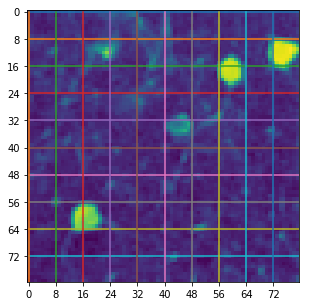

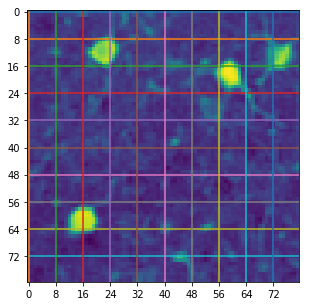

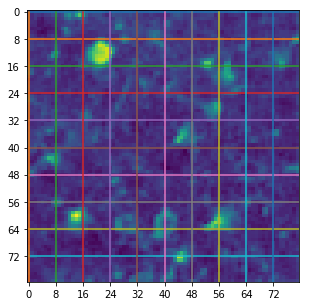

In [5]:
for Cn in [Cn1,Cn2,Cn3]:
    util_plot.tiling_grid_plot(Cn,nblocks=nblocks,plot_option='same')

In [6]:
import voxel_denoiser as voxdenoiser

In [7]:
import greedyPCA as gpca
import tool_grid

In [8]:
greedy = False
verbose = True
mean_th_factor = 1.15
fudge_factor = 0.9
confidence = 0.95
stim_knots = None
stim_delta = 200
U_update = False
interleave= False
nblocks=[10,10]

In [9]:
import voxel_denoiser

In [11]:
offset_case=None
if not isinstance(W1,list):
    W1_,dims = tool_grid.offset_tiling(W1,
                     nblocks=nblocks,
                     offset_case=offset_case)
    W2_,_ = tool_grid.offset_tiling(W2,
                     nblocks=nblocks,
                     offset_case=offset_case)

    W3_,_ = tool_grid.offset_tiling(W3,
                     nblocks=nblocks,
                     offset_case=offset_case)

dims_ = np.asarray(list(map(np.shape,W1_)))

args = [np.concatenate(ps,axis=0) for ii,ps in enumerate(zip(W1_,W2_,W3_))]


In [12]:
# DEBUG TO SELECT PARAMS
maxlag = 10
min_rank=2
plot_en=False
start=time.time()
if True: #debug code
    a,ctid = gpca.denoise_components(args[0][:,:,200:-100],
                                  maxlag =maxlag,
                                  greedy=True,
                                  verbose=verbose,
                                  plot_en=plot_en,
                                  mean_th_factor=mean_th_factor,
                                  fudge_factor=fudge_factor,
                                  confidence=confidence,
                                    min_rank=min_rank)
print(time.time()-start)

Initialization with 1 components
solve V(i) = argmin_W ||D^2 W||_1 
	 st ||V_i-W||_2<fudge_factor*sigma_i*sqrt(T)
Max # of greedy loops: 10 (relative convergence)
U = Y*pinv(V)
*Iteration 0: initialization 1 components
solve V(i)
Noise range is 1.856e-02 1.856e-02
Iteration 0: begin greedy loops
	Iteration 0 loop 0 with 1 components
	update V_i in closed form
	update U_j in closed form/regression
	Iteration 0 loop 0 error (140040+440+0)=140480
	Iteration 0 loop 1 with 1 components
	update V_i in closed form
	update U_j in closed form/regression
	Iteration 0 loop 1 error (140021+430+0)=140452
	Iteration 0 loop 1 end - no significant updates
*Iteration 0 residual search with 1 components
Final number of components 1
Final update, totaliterations 0
	Final update of temporal components
	Final update of spatial components
	Final regression for V(j)
1.438878059387207


In [13]:
W1=W1[:,:,200:-100]
W2=W2[:,:,200:-100]
W3=W3[:,:,200:-100]

In [14]:
greedy=True
W_four_1,W_four_2,W_four_3,ranks_ = voxel_denoiser.denoise_dx_voxel_tiling(W1,W2,W3,
                                                                    dx=4,
                                                                     nblocks=nblocks,
                                                                     interleave=interleave,
                                                                     maxlag=maxlag,
                                                                     confidence=confidence,
                                                                     greedy = greedy,
                                                                     fudge_factor=fudge_factor,
                                                                     mean_th_factor=mean_th_factor,
                                                                     U_update=U_update,
                                                                     min_rank=min_rank,
                                                                     stim_knots=stim_knots,
                                                                     stim_delta = stim_delta
                                                )

	M	rank: 1	run_time: 2.318876
	M	rank: 2	run_time: 2.496382
	M	rank: 3	run_time: 2.791898
	M	rank: 3	run_time: 2.817033
	M	rank: 3	run_time: 2.760815
	M	rank: 3	run_time: 2.923709
	M	rank: 5	run_time: 3.131920
	M	rank: 3	run_time: 3.216943
	M	rank: 4	run_time: 4.277421
	M	rank: 1	run_time: 2.353186
	M	rank: 5	run_time: 5.350639
	M	rank: 4	run_time: 3.153429
	M	rank: 2	run_time: 2.666004
	M	rank: 4	run_time: 5.555253
	M	rank: 2	run_time: 3.230331
	M	rank: 3	run_time: 2.842425
	M	rank: 3	run_time: 2.774591
	M	rank: 2	run_time: 2.638490
	M	rank: 5	run_time: 6.915715
	M	rank: 5	run_time: 8.039903
	M	rank: 9	run_time: 8.525843
	M	rank: 6	run_time: 9.599510
	M	rank: 9	run_time: 6.992091
	M	rank: 3	run_time: 4.642262
	M	rank: 5	run_time: 3.567752
	M	rank: 6	run_time: 5.548325
	M	rank: 6	run_time: 5.862456
	M	rank: 4	run_time: 5.482536
	M	rank: 6	run_time: 5.949464
	M	rank: 5	run_time: 6.503150
	M	rank: 7	run_time: 9.692178
	M	rank: 4	run_time: 2.754202
	M	rank: 6	run_time: 7.311691
	M	rank: 5

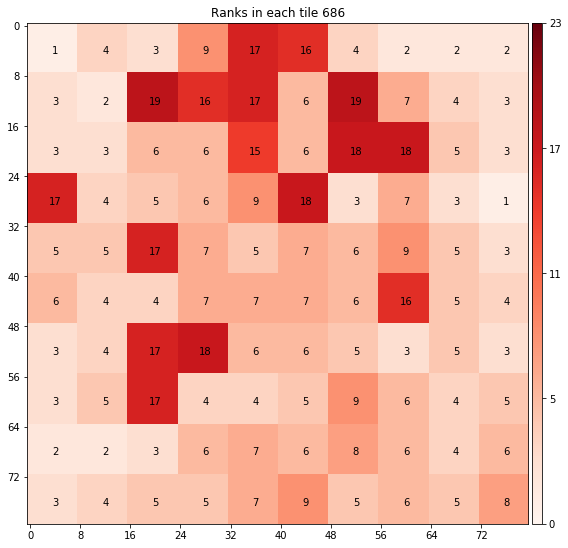

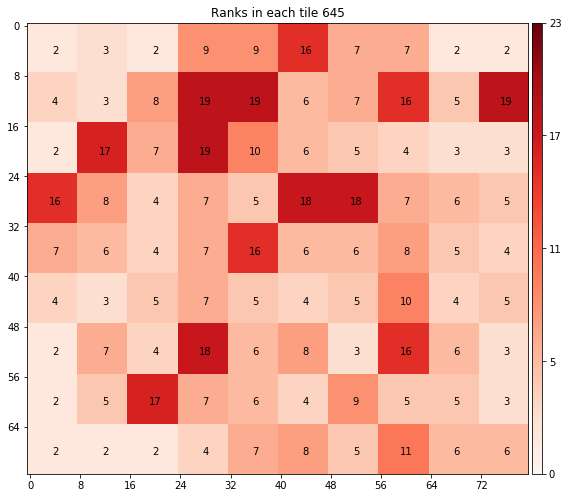

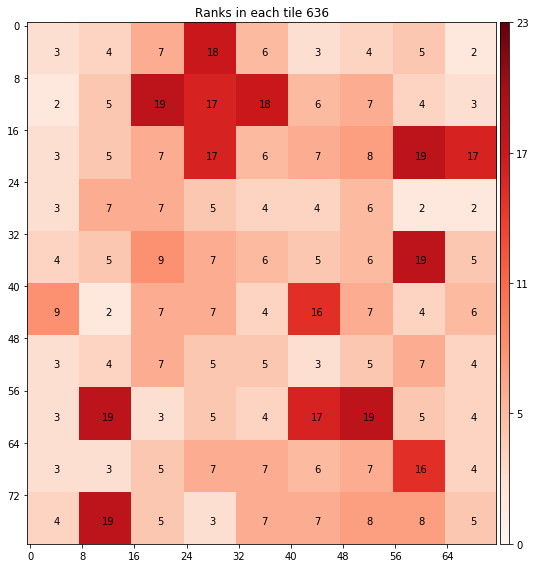

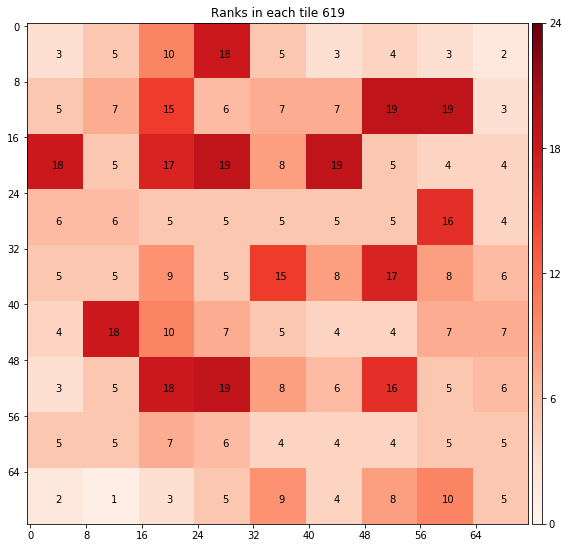

In [15]:
_ = util_plot.cn_ranks_dx_plot(ranks_,dims,nblocks=nblocks,figsize=8,fontsize=10)

(80, 80, 700)
Local correlation:  range [-2.1e-02 9.4e-01]
(80, 80, 700)
Local correlation:  range [6.3e-03 1.0e+00]
(80, 80, 700)
Local correlation:  range [-2.2e-02 1.9e-01]


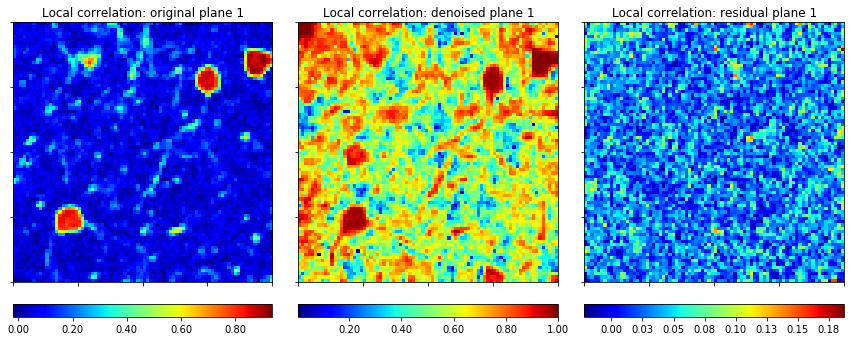

(80, 80, 700)
Local correlation:  range [-2.2e-02 9.1e-01]
(80, 80, 700)
Local correlation:  range [6.1e-02 1.0e+00]
(80, 80, 700)
Local correlation:  range [-2.2e-02 1.3e-01]


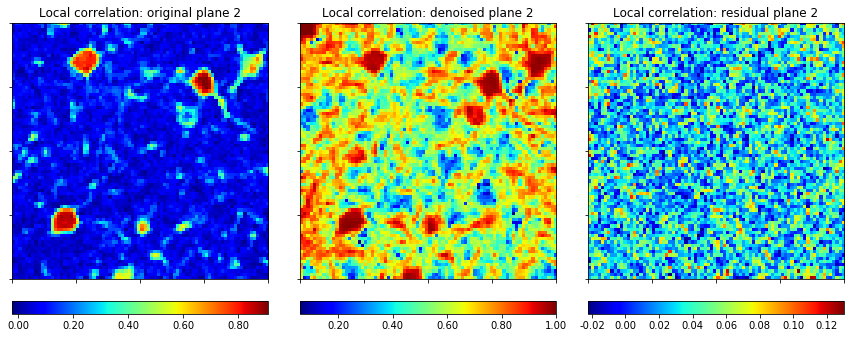

(80, 80, 700)
Local correlation:  range [-2.1e-02 8.0e-01]
(80, 80, 700)
Local correlation:  range [9.0e-02 1.0e+00]
(80, 80, 700)
Local correlation:  range [-2.1e-02 1.9e-01]


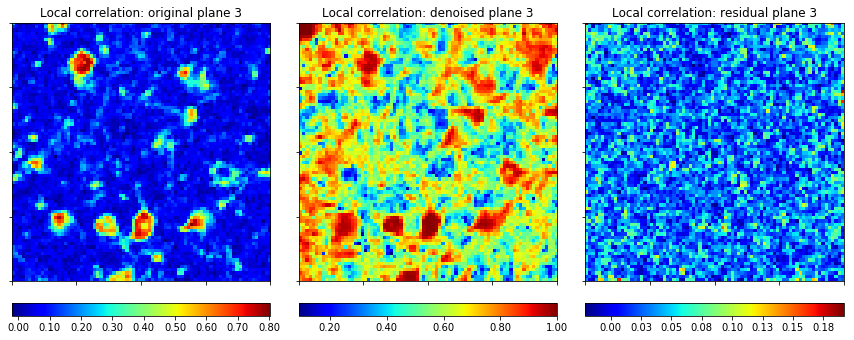

In [16]:
util_plot.comparison_plot([W1,W_four_1],
                          plot_orientation='vertical',
                         cbar_orientation='horizontal',
                         title_suffix='plane 1')
util_plot.comparison_plot([W2,W_four_2],plot_orientation='vertical',
                         cbar_orientation='horizontal',
                         title_suffix='plane 2')
util_plot.comparison_plot([W3,W_four_3],plot_orientation='vertical',
                         cbar_orientation='horizontal',
                         title_suffix='plane 3')

In [ ]:
#np.savez('lab/Baylor_out.npz',W_four_1=W_four_1,W_four_2=W_four_2,W_four_3=W_four_3)

In [17]:
Yd1 =W_four_1*nl1[:,:,np.newaxis]+mean_px1[:,:,np.newaxis]+ offset_1[:,:,200:-100]
Yd2 =W_four_2*nl2[:,:,np.newaxis]+mean_px2[:,:,np.newaxis]+ offset_2[:,:,200:-100]
Yd3 =W_four_3*nl3[:,:,np.newaxis]+mean_px3[:,:,np.newaxis]+ offset_3[:,:,200:-100]

In [18]:
import superpixel_analysis as sup
num_plane=3
Yd = np.concatenate([Yd1, Yd2, Yd3],axis=1);

In [19]:

dims = Yd.shape;
T = dims[2];

In [20]:
Yt = sup.threshold_data(Yd) 

In [21]:
cut_off_point = 0.85; ############# correlation threshold #############
length_cut = 30; ################## size threshold ##################

In [22]:
connect_mat_1, idx, comps, permute_col = sup.find_superpixel_3d(Yt, num_plane, cut_off_point, length_cut, eight_neighbours=True)

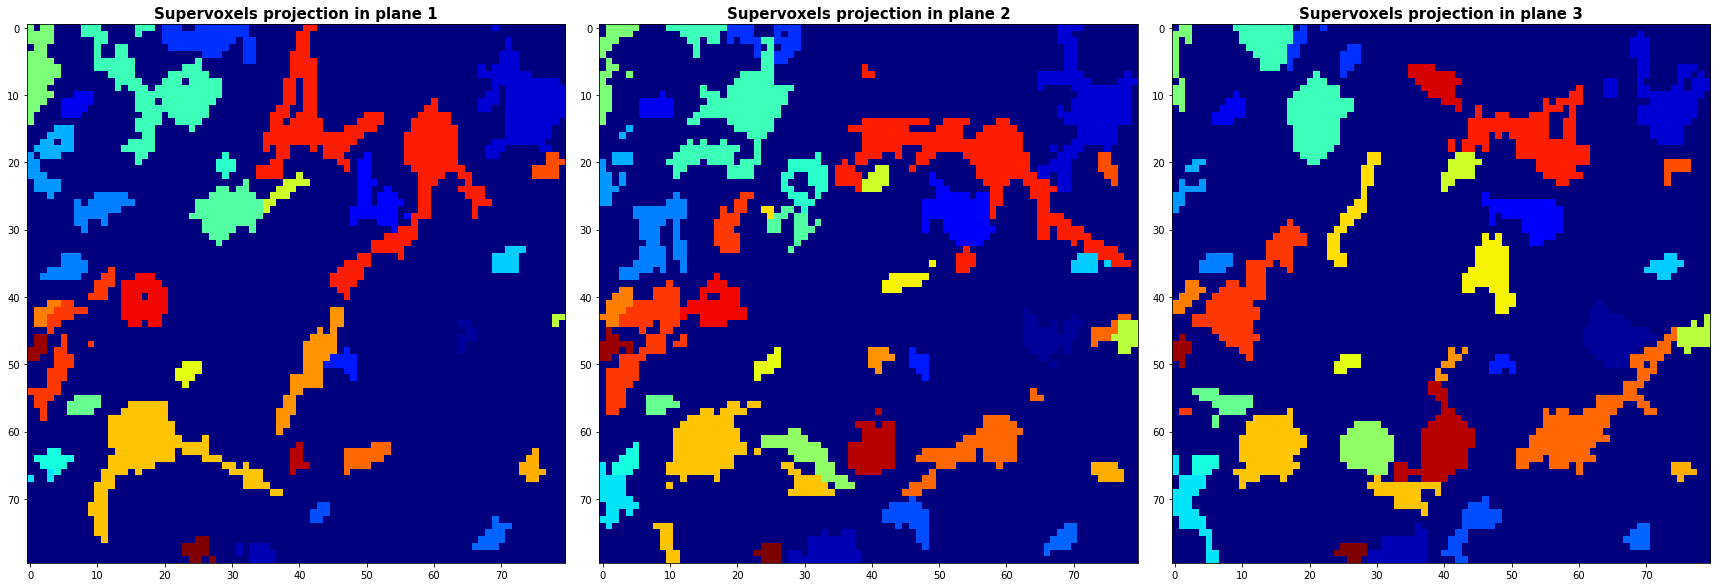

In [23]:
fig = plt.figure(figsize=(24,8))
for ii in range(3):
    plt.subplot(1,3,ii+1);
    plt.imshow(connect_mat_1[:,:,ii],cmap='jet');
    plt.title("Supervoxels projection in plane " + str(ii+1),fontsize=15,fontweight="bold");
fig.tight_layout()
#fig.savefig(out_di

In [24]:
Cnt = sup.local_correlations_fft(Yt);


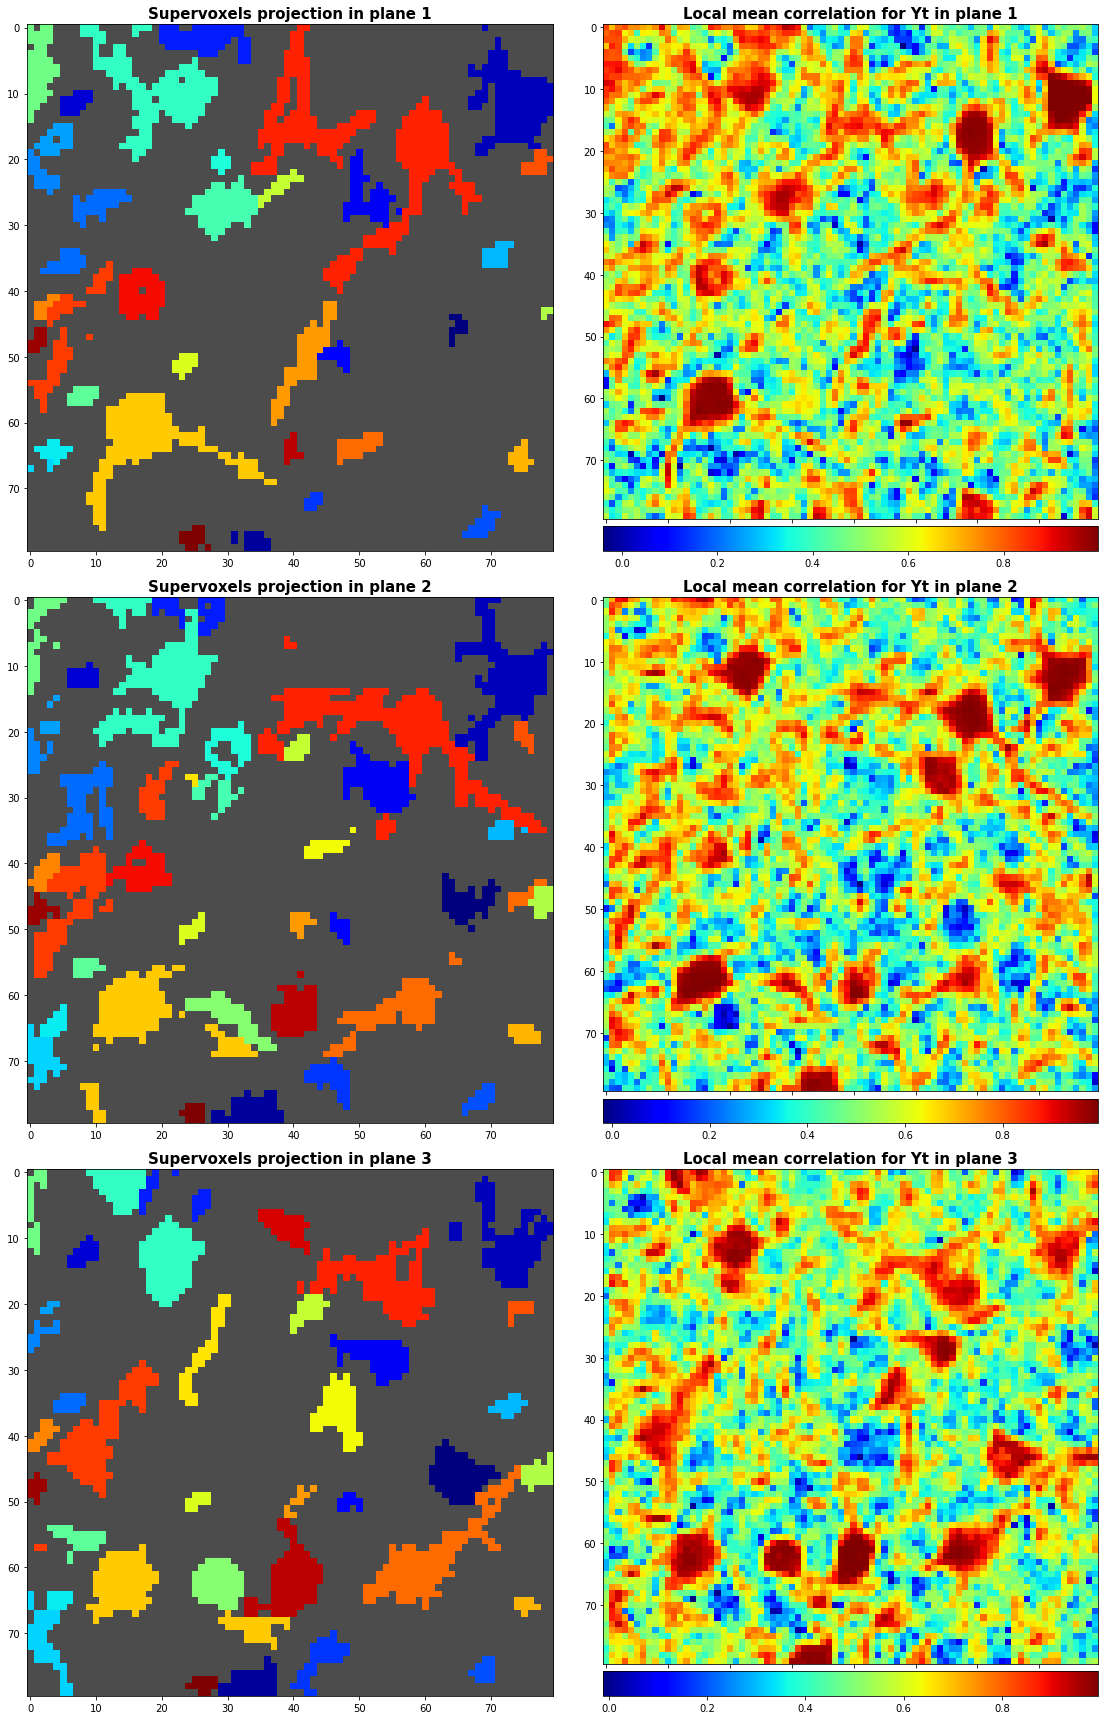

In [26]:
import matplotlib

connect_mat_1p=connect_mat_1.copy()
cmap = matplotlib.cm.jet
cmap.set_bad('0.3',1.)
connect_mat_1p[connect_mat_1==0]=np.nan

fig = plt.figure(figsize=(16,8*num_plane))

for ii in range(num_plane):
    ax = plt.subplot(num_plane,2,2*ii+1);
    ax.imshow(connect_mat_1p[:,:,ii],cmap=cmap);
    ax.set(title="Supervoxels projection in plane " + str(ii+1))
    ax.title.set_fontsize(15)
    ax.title.set_fontweight("bold")
    
    ax1 = plt.subplot(num_plane,2,2*ii+2);
    sup.show_img(ax1, Cnt.reshape(connect_mat_1p.shape,order="F")[:,:,ii]);
    ax1.set(title="Local mean correlation for Yt in plane " + str(ii+1))
    ax1.title.set_fontsize(15)
    ax1.title.set_fontweight("bold")
plt.tight_layout()

In [27]:
V_mat, U_mat, B_mat = sup.spatial_temporal_ini(Yt, comps, idx, length_cut, maxiter=5, whole_data=True);

In [28]:
Ys_r = np.matmul(U_mat, V_mat.T) + B_mat.sum(axis=1).reshape(np.prod(dims[:2]),1)
Ys = Ys_r.reshape(dims[0],dims[1],T,order="F");

In [29]:

################### specify a small region to find out all the pure superpixels in this region ##################
up=0;
down=79;
left=0;
right=79;

In [30]:
unique_pix, M = sup.search_superpixel_in_range([up,down],[left,right], connect_mat_1, permute_col, V_mat);

In [31]:
pure_pixels, coef, coef_rank = sup.fast_sep_nmf(M, M.shape[1], 0.6);


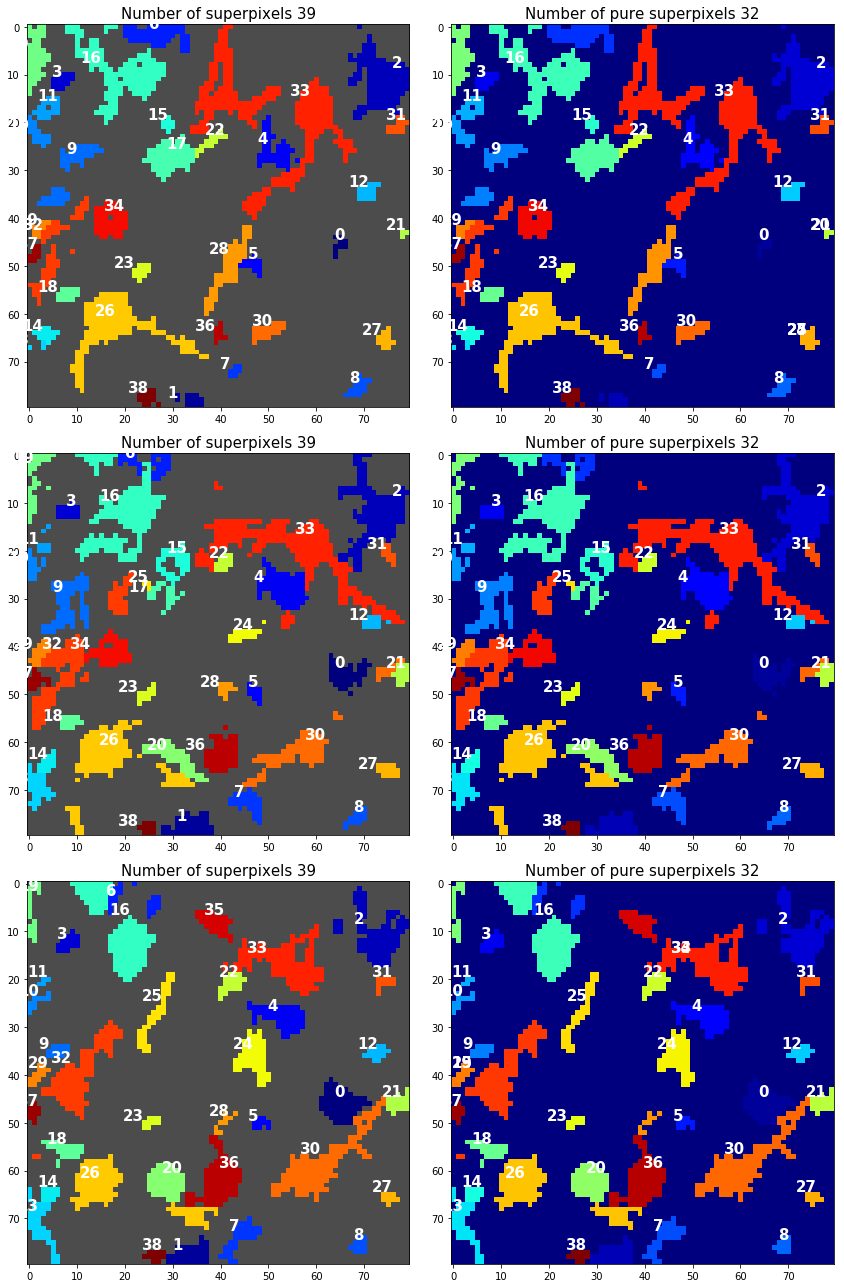

In [32]:
fig = plt.figure(figsize=(6*2,6*num_plane))

cmap = matplotlib.cm.jet
cmap.set_bad('0.3',1.)
connect_mat_1p=connect_mat_1.copy()
connect_mat_1p[connect_mat_1==0]=np.nan
    
import matplotlib
for jj in range(num_plane):
    ax = plt.subplot(num_plane,2,2*jj+1);

    ax.imshow(connect_mat_1p[up:(down+1),left:(right+1),jj],cmap=cmap);

    for ii in range(len(unique_pix)):
        pos = np.where(connect_mat_1p[:,:,jj] == unique_pix[ii]);
        if pos[0].size:
            pos0 = pos[0] - up;
            pos1 = pos[1] - left;
            ax.text((pos1)[np.array(len(pos1)/3,dtype=int)], (pos0)[np.array(len(pos0)/3,dtype=int)], f"{ii}",
                verticalalignment='bottom', horizontalalignment='right',color='white', fontsize=15, fontweight="bold")
    ax.set(title="Number of superpixels %d"%len(unique_pix))
    ax.title.set_fontsize(15)
    #ax.title.set_fontweight("bold")

    ax1 = plt.subplot(num_plane,2,2*jj+2);
    ax1.imshow(connect_mat_1[up:(down+1),left:(right+1),jj],cmap=cmap);

    for ii in range(len(pure_pixels)):
        pos = np.where(connect_mat_1[:,:,jj] == unique_pix[pure_pixels[ii]]);
        if pos[0].size:
            pos0 = pos[0] - up;
            pos1 = pos[1] - left;
        ax1.text((pos1)[np.array(len(pos1)/3,dtype=int)], (pos0)[np.array(len(pos0)/3,dtype=int)], f"{pure_pixels[ii]}",
            verticalalignment='bottom', horizontalalignment='right',color='white', fontsize=15, fontweight="bold")
    ax1.set(title="Number of pure superpixels %d"%len(pure_pixels))
    ax1.title.set_fontsize(15)
    #ax1.title.set_fontweight("bold")
plt.tight_layout()

In [33]:
a_ini, c_ini, y0, brightness_rank, pure_pix, corr_img_all_r = sup.prepare_iteration(Yt, connect_mat_1, permute_col, unique_pix, pure_pixels, V_mat, U_mat, [up,down],[left,right],num_plane=3)


3D data!


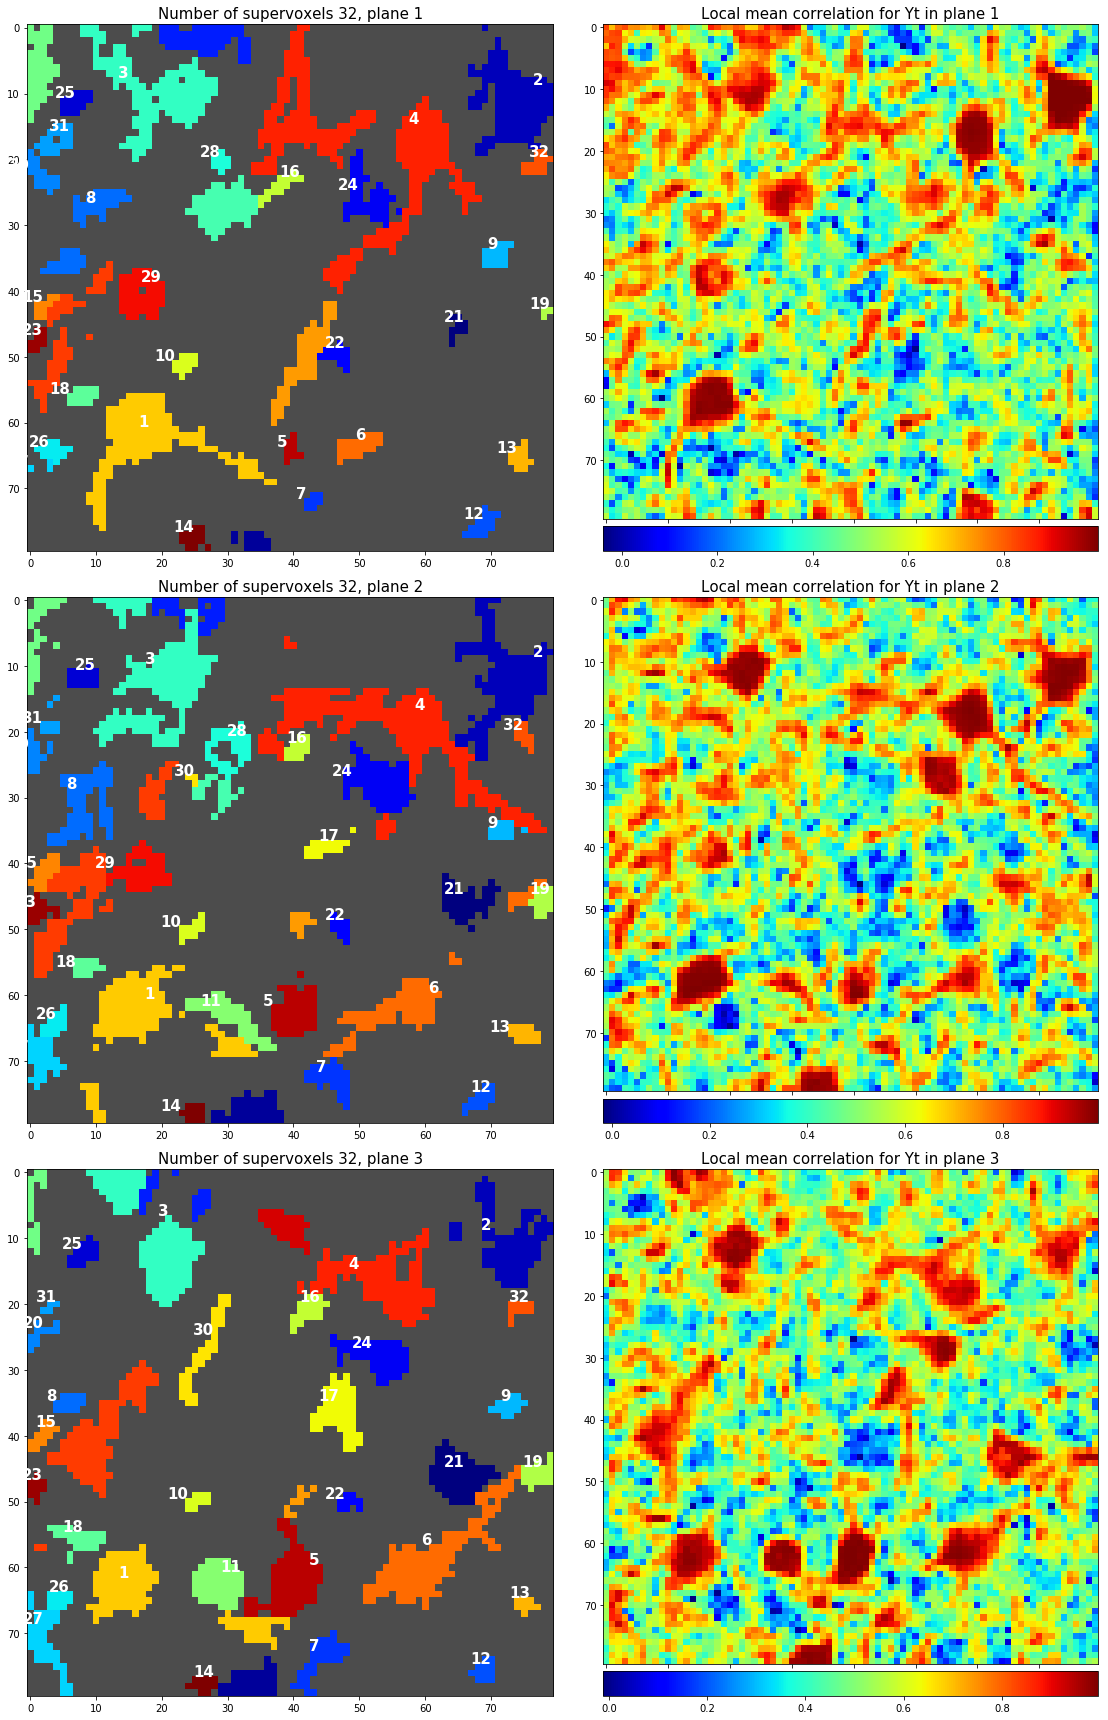

In [34]:
fig = plt.figure(figsize=(16,8*num_plane))
cmap = matplotlib.cm.jet
cmap.set_bad('0.3',1.)
connect_mat_1p=connect_mat_1.copy()
connect_mat_1p[connect_mat_1==0]=np.nan

for ii in range(num_plane):
    ax = plt.subplot(num_plane,2,2*ii+1);
    ax.imshow(connect_mat_1p[:,:,ii],cmap=cmap);
    for jj in range(len(pure_pix)):
        pos = np.where(connect_mat_1[:,:,ii] == pure_pix[jj]);
        if pos[0].size:
            pos0 = pos[0] - up;
            pos1 = pos[1] - left;
            ax.text((pos1)[np.array(len(pos1)/3,dtype=int)], 
                    (pos0)[np.array(len(pos0)/3,dtype=int)], f"{brightness_rank[jj]}",
                verticalalignment='bottom',
                    horizontalalignment='right',color='white', fontsize=15, fontweight="bold")
    plt.title("Number of supervoxels %d, plane %d" %(len(pure_pix),ii+1),fontsize=15)#,fontweight="bold");
    ax1 = plt.subplot(num_plane,2,2*ii+2);
    sup.show_img(ax1, Cnt.reshape(connect_mat_1.shape,order="F")[:,:,ii]);
    ax1.set(title="Local mean correlation for Yt in plane " + str(ii+1));
    ax1.title.set_fontsize(15)
   # ax1.title.set_fontweight("bold")
fig.tight_layout()
#fig.savefig("corr_labeled_fig.pdf")